<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

## *Data Science Unit 4 Sprint 3 Assignment 2*
# Convolutional Neural Networks (CNNs)

# Assignment

Load a pretrained network from Keras, [ResNet50](https://tfhub.dev/google/imagenet/resnet_v1_50/classification/1) - a 50 layer deep network trained to recognize [1000 objects](https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt). Starting usage:

```python
import numpy as np

from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions

ResNet50 = ResNet50(weights='imagenet')
features = model.predict(x)

```

Next you will need to remove the last layer from the ResNet model. Here, we loop over the layers to use the sequential API. There are easier ways to add and remove layers using the Keras functional API, but doing so introduces other complexities. 

```python
# Remote the Last Layer of ResNEt
ResNet50._layers.pop(0)

# Out New Model
model = Sequential()

# Add Pre-trained layers of Old Model to New Model
for layer in ResNet50.layers:
    model.add(layer)

# Turn off additional training of ResNet Layers for speed of assignment
for layer in model.layers:
    layer.trainable = False

# Add New Output Layer to Model
model.add(Dense(1, activation='sigmoid'))
```

Your assignment is to apply the transfer learning above to classify images of Mountains (`./data/mountain/*`) and images of forests (`./data/forest/*`). Treat mountains as the postive class (1) and the forest images as the negative (zero). 

Steps to complete assignment: 
1. Load in Image Data into numpy arrays (`X`) 
2. Create a `y` for the labels
3. Train your model with pretrained layers from resnet
4. Report your model's accuracy

## 1. Load in Image Data into numpy arrays (X), create a y for the labels
- use scikit-image: it is a collection of algorithms for image processing
- imread_collection() takes in a list of objects, usually filenames! returns a collection of images

In [4]:
from skimage.io import imread_collection
from skimage.transform import resize
import numpy as np

from sklearn.model_selection import train_test_split

In [25]:
# data path
mountains = './data/mountain/*.jpg' 
forests = './data/forest/*.jpg'

In [26]:
# creating a collection with the available images
# concat the strings
mountains = imread_collection(mountains).concatenate()
forests = imread_collection(forests).concatenate()

In [ ]:
mountains # is an array, dtype=uint8

In [27]:
# the .shape method 
mountains.shape[0]

374

In [31]:
# create matrix ? of zeros in the size of the string collection
y_0 = np.zeros(mountains.shape[0])
y_1 = np.zeros(forests.shape[0])

In [33]:
# merge the two datasets
X = np.concatenate([forests, mountains])

# resize all images
X = resize(X, (702,224,224,3)) # 702 = len(data)

# merge the zeroes matrix 
y = np.concatenate((y_0, y_1))

In [42]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=.5)

In [43]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((351, 224, 224, 3), (351, 224, 224, 3), (351,), (351,))

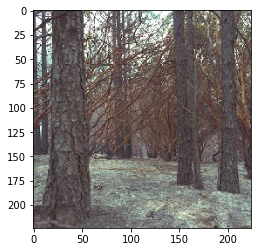

In [38]:
# look at a random image
import matplotlib.pyplot as plt
plt.imshow(X[256]);

## 2. Train your model with pretrained layers from resnet

In [39]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D

# load pre-trained network
res = ResNet50(input_shape=(224, 224, 3), weights='imagenet', include_top=False)

# make all resnet layers untrainable
for layer in res.layers:
    layer.trainable = False

# instantiate model
x = res.output
x = GlobalAveragePooling2D()(x) # ???
x = Dense(1024, activation='relu')(x)
x = Dense(512, activation='relu')(x)
x = Dense(256, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)
model = Model(inputs=res.input, outputs=predictions)

//anaconda3/envs/U4-S3-DNN/lib/python3.7/site-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


In [ ]:
model.summary()

## 3. Fit model

In [41]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X, y, epochs=5, validation_split=.2)

Train on 561 samples, validate on 141 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/5
561/561 [==============================] - 177s 316ms/sample - loss: 0.0717 - acc: 0.9430 - val_loss: 1.0000e-07 - val_acc: 1.0000
Epoch 2/5
561/561 [==============================] - 161s 286ms/sample - loss: 1.0000e-07 - acc: 1.0000 - val_loss: 1.0000e-07 - val_acc: 1.0000
Epoch 3/5
561/561 [==============================] - 169s 301ms/sample - loss: 1.0000e-07 - acc: 1.0000 - val_loss: 1.0000e-07 - val_acc: 1.0000
Epoch 4/5
561/561 [==============================] - 159s 283ms/sample - loss: 1.0000e-07 - acc: 1.0000 - val_loss: 1.0000e-07 - val_acc: 1.0000
Epoch 5/5
561/561 [==============================] - 153s 273ms/sample - loss: 1.0000e-07 - acc: 1.0000 - val_loss: 1.0000e-07 - val_acc: 1.0000


## 4. Accuracy
- model.evaluate() returns the loss value and metrics values in test mode
- if the model has a single output, then it will only return test loss
- if there are multiple outputs and/or metrics, will return a list of scalars

In [45]:
score = model.evaluate(x_test, y_test, verbose=0)

Test accuracy: 1.0


In [48]:
model.metrics_names

['loss', 'acc']

In [46]:
score

[1.0000001537946446e-07, 1.0]

In [47]:
print('Test accuracy:', score[1])

Test accuracy: 1.0


In [50]:
for metric in model.metrics_names:
    print(metric, score[0])
    print(metric, score[1])

loss 1.0000001537946446e-07
loss 1.0
acc 1.0000001537946446e-07
acc 1.0


# Resources and Stretch Goals

Stretch goals
- Enhance your code to use classes/functions and accept terms to search and classes to look for in recognizing the downloaded images (e.g. download images of parties, recognize all that contain balloons)
- Check out [other available pretrained networks](https://tfhub.dev), try some and compare
- Image recognition/classification is somewhat solved, but *relationships* between entities and describing an image is not - check out some of the extended resources (e.g. [Visual Genome](https://visualgenome.org/)) on the topic
- Transfer learning - using images you source yourself, [retrain a classifier](https://www.tensorflow.org/hub/tutorials/image_retraining) with a new category
- (Not CNN related) Use [piexif](https://pypi.org/project/piexif/) to check out the metadata of images passed in to your system - see if they're from a national park! (Note - many images lack GPS metadata, so this won't work in most cases, but still cool)

Resources
- [Deep Residual Learning for Image Recognition](https://arxiv.org/abs/1512.03385) - influential paper (introduced ResNet)
- [YOLO: Real-Time Object Detection](https://pjreddie.com/darknet/yolo/) - an influential convolution based object detection system, focused on inference speed (for applications to e.g. self driving vehicles)
- [R-CNN, Fast R-CNN, Faster R-CNN, YOLO](https://towardsdatascience.com/r-cnn-fast-r-cnn-faster-r-cnn-yolo-object-detection-algorithms-36d53571365e) - comparison of object detection systems
- [Common Objects in Context](http://cocodataset.org/) - a large-scale object detection, segmentation, and captioning dataset
- [Visual Genome](https://visualgenome.org/) - a dataset, a knowledge base, an ongoing effort to connect structured image concepts to language